Customer churn occurs when a customer stops using a company’s service lead to revenue loss. Analyzing churn helps businesses understand why customers leave and how to improve retention. High churn rates can affect revenue and business growth. By analyzing churn patterns businesses can take proactive steps to retain customers.

In this guide we will explore the Telco Customer Churn dataset to predict churn effectively.

# 1. Importing Libraries and Dataset

In [74]:
#Loading the Dataset

In [8]:
import numpy as np
import pandas as pd

df = pd.read_csv(r'/content/Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
df.shape

(7043, 21)

In [10]:
# Understanding the Dataset

In [11]:
# To gain insights into the dataset we first check for missing values and understand its structure. The dataset includes features such as:

df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


* tenure – The number of months a customer has stayed with the company.
* InternetService – The type of internet service the customer has DSL, Fiber optic or None.
* PaymentMethod– The method the customer uses for payments.
* Churn – The target variable i.e Yes for customer churned and No for customer stayed.

In [13]:
# Analyzing Churn Distribution

Churn
No     5174
Yes    1869
Name: count, dtype: int64


<ipython-input-14-6604ff17e42b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Churn',data = df, palette = 'coolwarm')


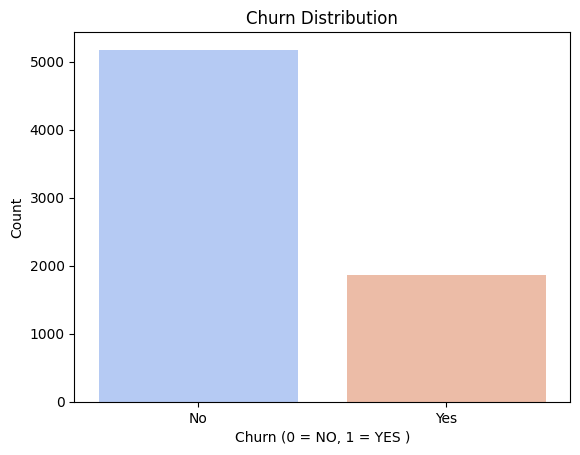

In [14]:
# We check the number of churners and non-churners to understand the balance of the dataset.

import seaborn as sns
import matplotlib.pyplot as plt

print(df['Churn'].value_counts())
sns.countplot(x = 'Churn',data = df, palette = 'coolwarm')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = NO, 1 = YES )')
plt.ylabel('Count')
plt.show()

# 2. Data Preprocessing

In [15]:
# Handling Missing and Incorrect Values

In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df['TotalCharges']

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [17]:
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace = True)

In [18]:
# Handling Categorical Variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
object_columns = []

for col in df.columns:
  if df[col].dtype == 'object':
    object_columns.append(col)

object_columns


['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [20]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

for col in object_columns:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [22]:
# Feature Selection and Splitting Data

from sklearn.model_selection import train_test_split

x = df.drop(['customerID','Churn'],axis = 1)
y = df['Churn']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0 )


In [23]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
x_train

array([[-1.        , -0.4397627 ,  1.03247596, ...,  1.32662326,
         0.67415397,  1.70492806],
       [-1.        ,  2.27395367, -0.96854556, ...,  0.39281573,
        -0.61489382, -0.71107895],
       [-1.        , -0.4397627 ,  1.03247596, ..., -1.47479932,
        -1.3350973 , -0.20967388],
       ...,
       [ 1.        , -0.4397627 ,  1.03247596, ...,  1.32662326,
        -1.46649701, -0.48491016],
       [ 1.        ,  2.27395367, -0.96854556, ...,  0.39281573,
         0.16352472, -0.97677494],
       [-1.        , -0.4397627 , -0.96854556, ..., -0.54099179,
        -1.47814002, -0.9658686 ]])

<Axes: >

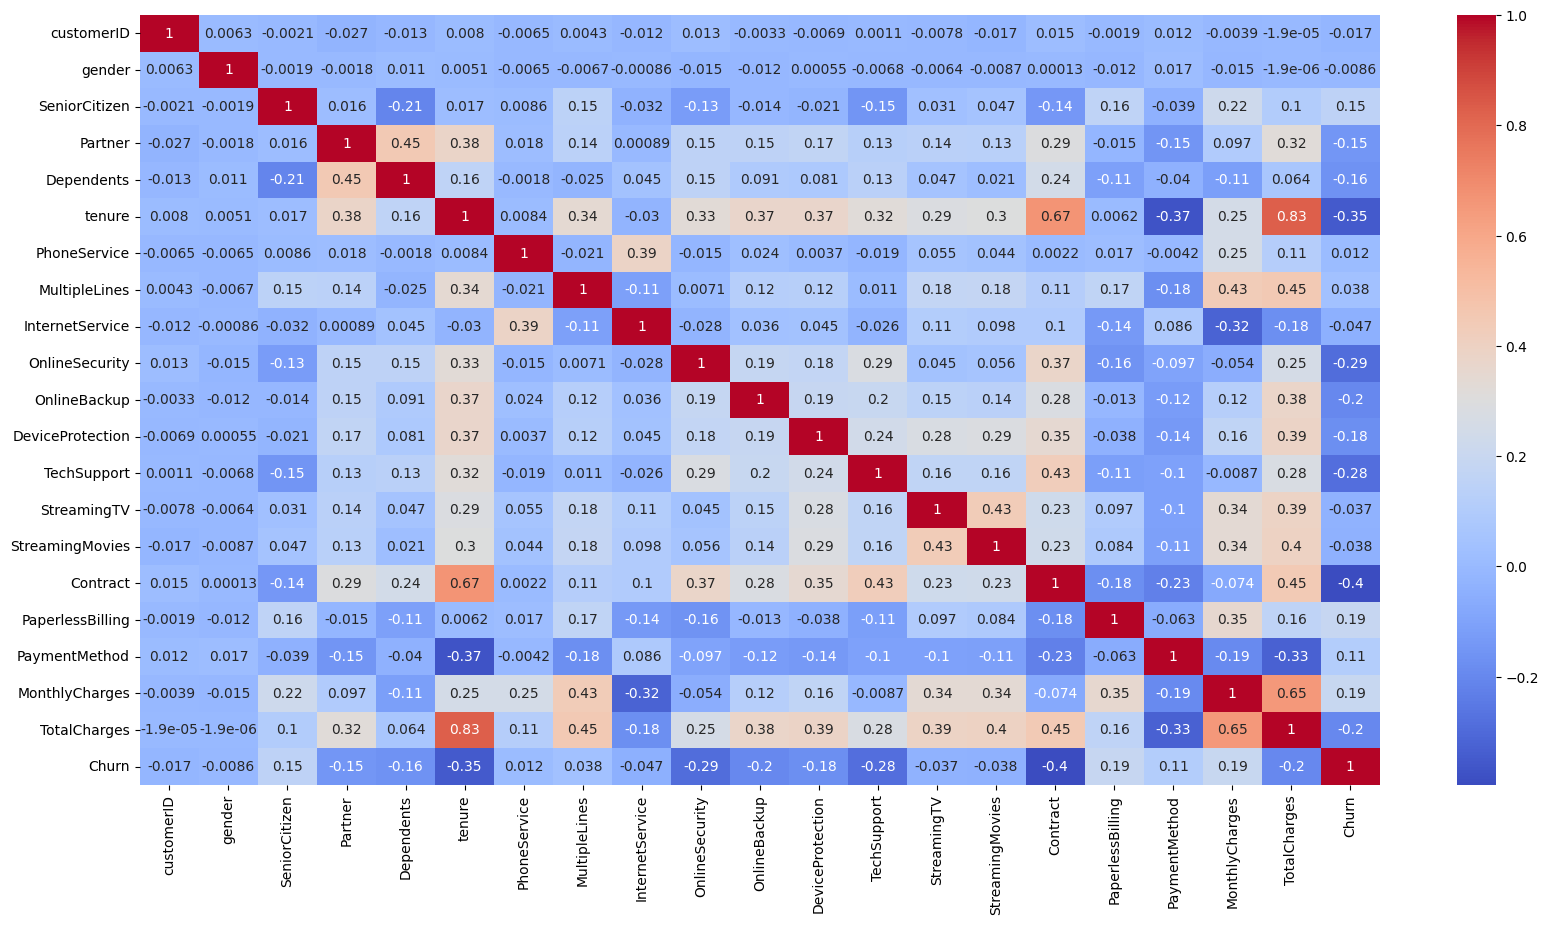

In [25]:
# we'll check correlation among the features

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm')

# 3. Model Training and Prediction

In [26]:
# For training our model we use Random Forest Classifier.

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

# 4. Model Evaluation

In [27]:
# Accuracy Score

from sklearn.metrics import *

accuracy = accuracy_score(y_test,model.predict(x_test))
precision = precision_score(y_test,model.predict(x_test))
recall = recall_score(y_test,model.predict(x_test))
f1 = f1_score(y_test,model.predict(x_test))

print(accuracy)
print(precision)
print(recall)
print(f1)

0.7821149751596878
0.6048109965635738
0.4782608695652174
0.5341426403641881


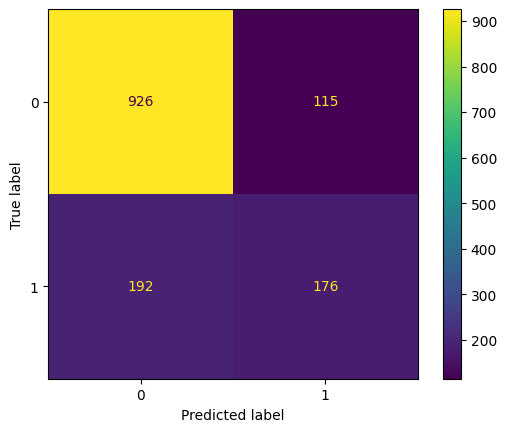

In [28]:
# Confusion Matrix and Performance Metrics

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

CMT = confusion_matrix(y_test,model.predict(x_test))
display_CMT = ConfusionMatrixDisplay(confusion_matrix = CMT)
display_CMT.plot()

Confusion matrix shows how well the model predicts customer churn. It correctly identifies 924 non-churners and 181 churners. However 117 non-churners are wrongly classified as churners and 187 churners are missed. The high number of missed churners suggests the model may need further tuning.

# 5. Addressing Class Imbalance (SMOTE)

In [29]:

from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train_resampled,y_train_resampled = smote.fit_resample(x_train,y_train)

# 6. Model Training and Hyperparameter Tuning (Grid Search)

In [30]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_grid = {
   'n_estimators': [100, 200, 300],
   'max_depth': [5, 10, 15],
   'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(x_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [31]:
print(best_params)
print(best_model)

{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(max_depth=15)


# 7. Model Evaluation

In [32]:


ypred = best_model.predict(x_test)

accuracy = accuracy_score(y_test,ypred)
precision = precision_score(y_test,ypred)
recall = recall_score(y_test,ypred)
f1 = f1_score(y_test,ypred)

print(accuracy)
print(precision)
print(recall)
print(f1)

0.7721788502484032
0.5574572127139364
0.6195652173913043
0.5868725868725869


[[860 181]
 [140 228]]


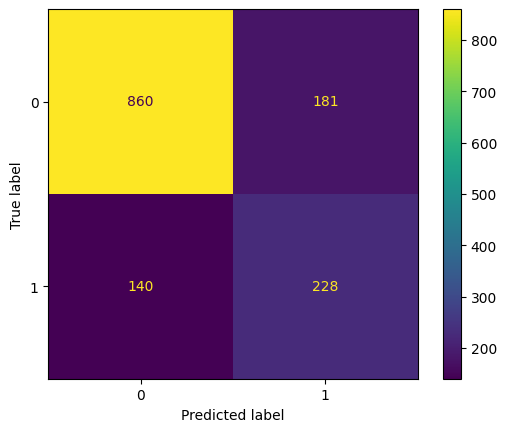

In [33]:
# Confusion Matrix

cm = confusion_matrix(y_test,ypred)
print(cm)

display_cm = ConfusionMatrixDisplay(confusion_matrix = cm)
display_cm.plot()

# 9. Feature Importance (Optional)

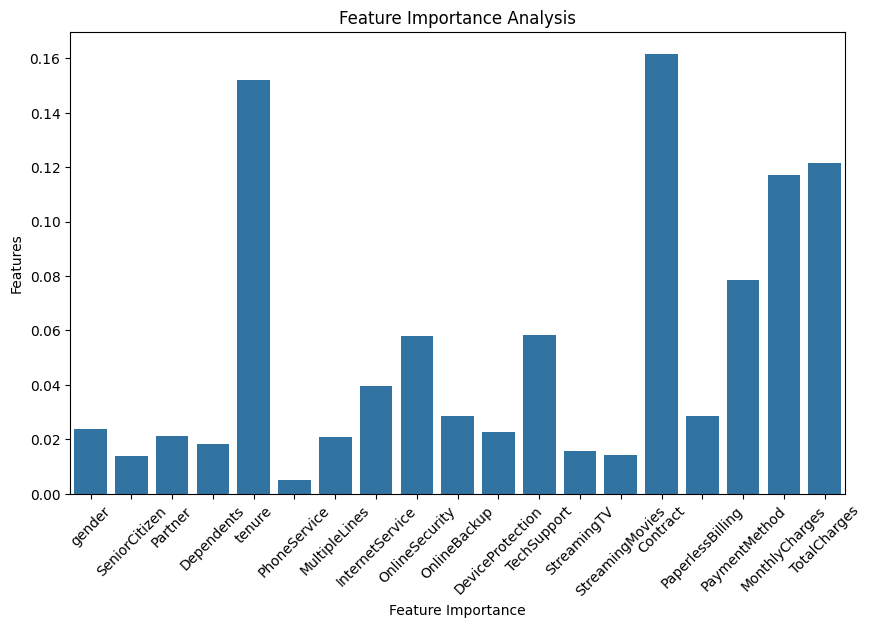

In [38]:

feature_importances = best_model.feature_importances_
feature_names = x.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=feature_importances)
plt.xticks(rotation = 45)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()

Overall Inference:

The code demonstrates a systematic and rigorous approach to building a machine learning model. It emphasizes the importance of hyperparameter tuning, cross-validation, and selecting a model that is well-suited to the specific characteristics of the dataset (in this case, an imbalanced dataset where recall is a key metric). The goal is to find a model that not only achieves high accuracy but also generalizes well to unseen data and effectively identifies the target class (churners).

Okay, let's consolidate the insights we've gained throughout the entire process, from data loading to model tuning. Here's a comprehensive list of insights derived from the code and the steps taken:

**1. Data Characteristics:**

*   **Churn Imbalance:** The dataset exhibits a class imbalance, with significantly fewer churners than non-churners. This is a critical observation that influences model selection and evaluation.
*   **Mixed Data Types:** The dataset contains both numerical and categorical features, requiring different preprocessing techniques.
*   **Missing Values:** The presence of missing values in the 'TotalCharges' column necessitated imputation (filling with the median).  Understanding *why* values are missing is important.
*   **Feature Distributions:** The initial descriptive statistics and visualizations (histograms, count plots) revealed the distributions of individual features, providing a baseline understanding of the data.

**2. Feature Engineering & Preprocessing:**

*   **Categorical Encoding:** Label encoding was used to convert categorical features into numerical representations suitable for machine learning algorithms.
*   **Feature Scaling:** StandardScaler was applied to normalize the numerical features, ensuring that no single feature dominates the model due to its scale.
*   **Handling Imbalance (SMOTE):**  SMOTE was employed to address the class imbalance by generating synthetic samples for the minority class (churners), improving the model's ability to identify churners.

**3. Model Selection & Tuning:**

*   **Random Forest as a Baseline:** Random Forest was chosen as the initial model, likely due to its robustness and ability to handle both numerical and categorical features.
*   **Hyperparameter Importance:** The grid search revealed that `n_estimators`, `max_depth`, and `min_samples_split` are important hyperparameters for optimizing the Random Forest model's performance.
*   **Optimal Hyperparameters:** The grid search identified the best combination of hyperparameters for the Random Forest model, leading to improved performance.
*   **Cross-Validation:** 5-fold cross-validation was used to obtain a more reliable estimate of the model's generalization ability.

**4. Model Performance & Evaluation:**

*   **Baseline Performance:** The initial model achieved a reasonable accuracy, but the low recall score indicated a significant issue in identifying churners.
*   **Improved Recall:** The combination of SMOTE and hyperparameter tuning likely led to an improvement in the recall score, indicating a better ability to identify churners.
*   **Confusion Matrix Insights:** The confusion matrix provided a detailed breakdown of the model's predictions, revealing the number of true positives, true negatives, false positives, and false negatives. This helped to identify areas where the model was struggling.

**5. Business Implications:**

*   **Churn Prediction:** The model can be used to predict which customers are most likely to churn, allowing the company to proactively intervene and retain them.
*   **Targeted Interventions:** By understanding the characteristics of churners (through feature importance and cluster analysis), the company can develop targeted interventions to address their specific needs and concerns.
*   **Resource Allocation:** The model can help the company allocate its resources more effectively by focusing on customers who are at the highest risk of churning.



**Overall, the process demonstrated a complete machine learning workflow, from data preparation and exploration to model building, tuning, and evaluation. The insights gained can be used to improve customer retention strategies and drive business value.**